<h1>Pandas Line Plot</h1>
<p><img src="images/1line.png" width="100%" /></p>
<ul>
  <li>Data visualization plays a crucial role in the success of data science projects, as it effectively communicates complex information through visual representations.</li>
  <li>Data visualization serves as a potent method for capturing emerging trends and facilitating the dissemination of valuable insights derived from data analysis.</li>
  <li>Pandas, renowned for its data analysis capabilities, also offers a diverse range of compelling features for visualizing data.</li>
</ul>

<h3>Pandas plot()</h3>
<ul>
<li>Pandas comes with a couple of plotting functionalities applicable on DataFrame- or series objects that use the Matplotlib library under the hood, which means any plot created by the Pandas library is a Matplotlib object.</li>
<li>The Pandas <code>plot()</code> method provides a set of plot styles through the <code>kind</code> keyword argument to create eleven different kinds of plots.</li>
</ul>
<br>
<h3>Pandas Line Plot</h3>
<ul>
<li>To create a line plot from the columns of a DataFrame use the pandas plot.line() function or the pandas plot() function with kind='line'.</li>
<li>Since the default type of plot in Pandas is the line plot, you can also omit the line keyword.</li>
<li>The following is the syntax:</li>
</ul>

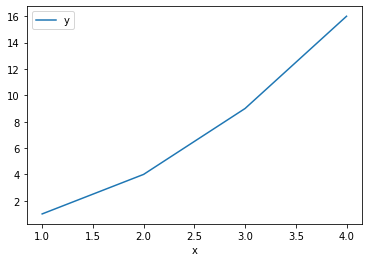

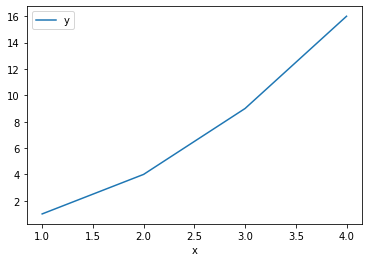

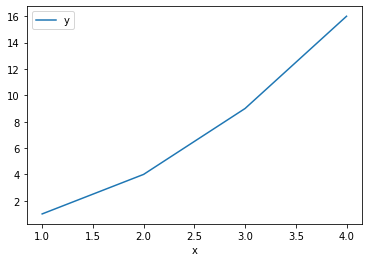

In [42]:
# Must import the Pandas Library
import pandas as pd
df = pd.DataFrame({ "x": [1, 2, 3, 4], "y": [1, 4, 9, 16]} )

plt = df.plot.line(x = "x", y = "y")
# or you can use 
plt = df.plot(kind='line', x = "x", y = "y")
# or you can use (because line is the default)
plt = df.plot(x = "x", y = "y")

<h3>Example using a  Real Data Set</h3>
<ul>
<li>We're going to work on the Monthly Sales data for the Product Categories based on the sample sales_data (see note at the bottom for details on how the dataset was generated).</li>
<li>Data File: <a href="data/monthly_sales_data.csv" target="_blank" rel="noopener" >monthly_sales_data.csv</a></li>
<li>It reads the data from a csv file and
<ul>
<li>converts the Date data from strings to dates using <code>parse_dates=</code></li>
<li>sets the Date column as the <strong>index</strong> for the DataFrame using <code>index_col=</code></li>
</ul>
</li>
<li>It uses the <code>head()</code> method to display the first 5 lines of the dataframe.</li>
</ul>

In [43]:
import pandas as pd

# Create a DataFrame from the monthly_sales_data csv file
# Ask it to convert all of the dates in the file from strings to dates
df = pd.read_csv("data/monthly_sales_data.csv", parse_dates=['Date'], index_col=["Date"])

display(df.head())

,Clothing,Cosmetics,Shoes
Date,,,
2022-01-31,694685.20,41961.12,438124.10
2022-02-28,632268.56,33788.46,423119.85
2022-03-31,699186.40,45457.88,380507.78
2022-04-30,655374.72,38992.94,423720.02
2022-05-31,697085.84,44400.72,421319.34


<h3>Line Plot</h3><ul>
<li>If you don’t provide a parameter to <code>.plot()</code>, then it creates a line plot with the index on the x-axis and all the numeric columns in the DataFrame on the y-axis.</li>
<li>To plot just one line from the DataFrame you set y="column_name".</li>
<li>If you omit the x axis values, the values for y will be plotted versus the index for the dataframe.</li>
</ul>

<AxesSubplot:xlabel='Date'>

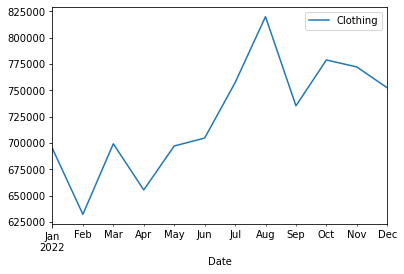

In [44]:
# Create a line plot for one of the columns in the table above
df.plot(y="Clothing")

<ul>
<li>We can see that demand for clothing was low through June but peaked in August and September, perhaps when seasons changes or when children are going back to school.</li>
</ul>
<h3>Multiple Lines</h3>
<ul>
<li>We can include all of the columns in the data set in the plot by not specifying a value for y.</li>
<li>We can use the <code>figsize</code> argument to change the default size of the plot (which is 6.4 by 4.8).</li>
<li>For example, let's see how the three product categories performed in 2022:</li>
</ul>

<AxesSubplot:xlabel='Date'>

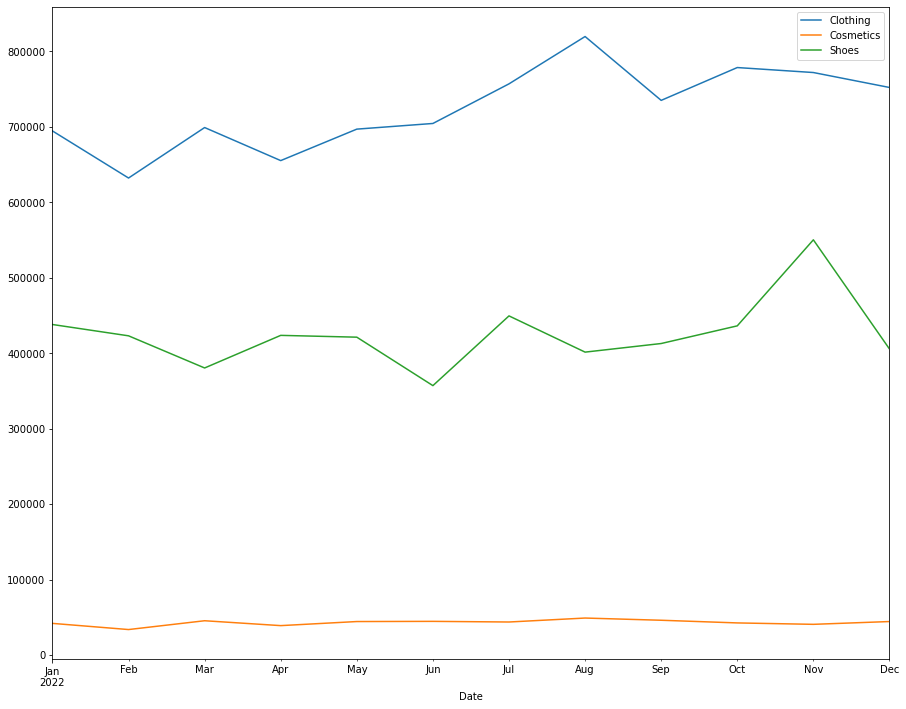

In [45]:
# Create a line plot for all of the columns in the table above
df.plot(figsize=(15,12))

<h3>Labeling the Plot</h3>
<ul>
  <li>To plot multiple lines from the data, we can specify a list of column names and assign it to the y-axis parameter.</li>
  <li>Additionally, the <code>plot()</code> method offers various parameters to enhance the plot's details:
    <ul>
      <li>The <code>title</code> argument, we can add a descriptive title to the plot.</li>
      <li>The <code>ylabel</code> parameter allows us to label the y-axis.</li>
      <li>The plot includes a legend (by default) which provides a key to distinguish between the different lines in the plot, making it easier to interpret the data when multiple lines are plotted. </li>
    </ul>
  </li>
</ul>

<AxesSubplot:title={'center':'2022 Sales'}, xlabel='Date', ylabel='USD'>

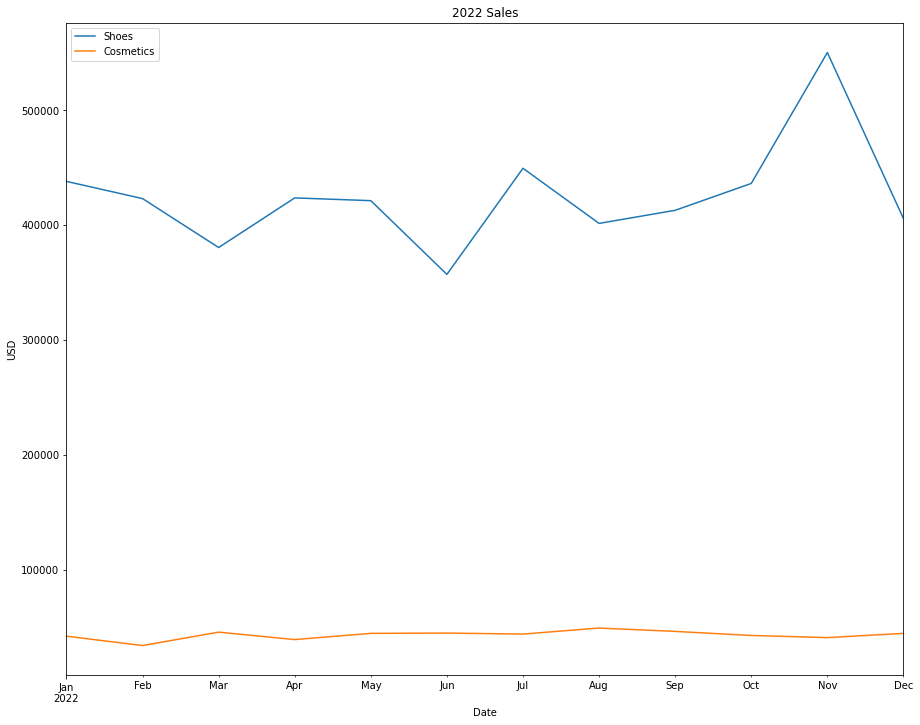

In [46]:
#We can use the other parameters provided by the plot() method to add more details to a plot
df.plot(y=["Shoes", "Cosmetics"], figsize=(15,12), 
        title='2022 Sales', ylabel='USD')

<h3>Subplots</h3>
<ul>
<li>You can also plot each numerical column in the DataFrame on separate subplots. </li>
<li>Sets subplots=True when creting th plots</li>
</ul>


array([<AxesSubplot:xlabel='Date', ylabel='USD'>,
       <AxesSubplot:xlabel='Date', ylabel='USD'>,
       <AxesSubplot:xlabel='Date', ylabel='USD'>], dtype=object)

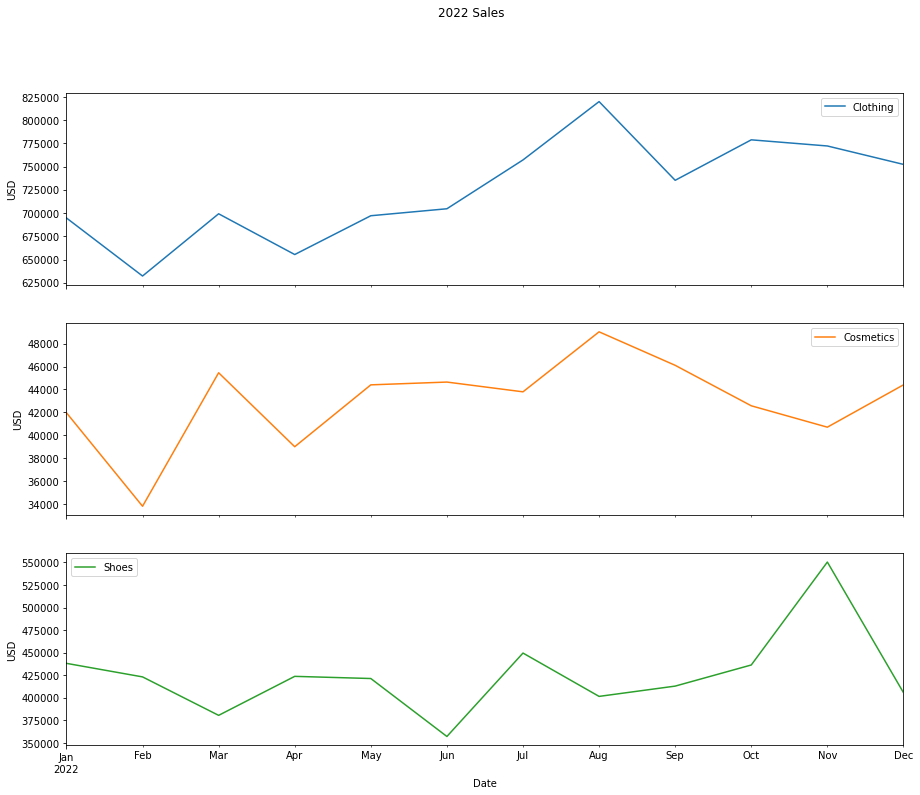

In [47]:
#We can use subplots parameter to have each line plotted on a subplot
df.plot(title='2022 Sales', ylabel='USD', figsize=(15,12), subplots=True)

<hr>
<h3>Note About the Dataset</h3>
<ul>
<li>The visualizations above were created using a dataset that was bassed on aggregate data from our original sales_data data.</li>
<li>The code below loads the sample Pandas DataFrame that we use throughout the lecture from this file: <a title="sales_data.csv" href="data/sales_data.csv" target="_blank" rel="noopener" >sales_data.csv</a> BUT then it converts it to a form that is more suitable for line (and other) plots.</li>
<li>Note: This is a different (larger) data set than the one described in the lecture video - the columns are not idential.</li>
<li>The code below is for reference as it uses advanced topics: pivot tables and refactoring (you do not ned to do this)</li>
</ul>

In [48]:
# This cell shows how I created the file to include only monthly data
# It is for reference as it uses advanced topics: pivot tables and refactoring
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("data/sales_data.csv", parse_dates=['Date'])

# Process Data So it is Suitable for a line plot
# Create a Pivot table Type are columns, Date is rows, Data is summed by date
pt= pd.pivot_table(df, values=['Sales'], columns=['Category'], index=['Date'], aggfunc=np.sum)

# Hard to see trends by date so aggregate by month
pt_Months = pt.resample(rule='M').sum()["Sales"]
print(pt_Months)

pt_Months.to_csv("data/monthly_sales_data.csv")

Category     Clothing  Cosmetics      Shoes
Date                                       
2022-01-31  694685.20   41961.12  438124.10
2022-02-28  632268.56   33788.46  423119.85
2022-03-31  699186.40   45457.88  380507.78
2022-04-30  655374.72   38992.94  423720.02
2022-05-31  697085.84   44400.72  421319.34
2022-06-30  704587.84   44644.68  357101.15
2022-07-31  757101.84   43790.82  449527.33
2022-08-31  819818.56   49035.96  401513.73
2022-09-30  735196.00   46108.44  412916.96
2022-10-31  778707.60   42571.02  436323.59
2022-11-30  772105.84   40700.66  550355.89
2022-12-31  752300.56   44400.72  405714.92


<hr>
<h4>References</h4>
<ul><li>Mehdi Lotfinejad, How to Plot a DataFrame Using Pandas, 6/8/22, <a href="https://www.dataquest.io/blog/plot-dataframe-pandas/" target="_blank" rel="noopener">https://www.dataquest.io/blog/plot-dataframe-pandas/</a></li>
<li>How do I create plots in pandas?, Pandas Documentation<a href="https://pandas.pydata.org/docs/getting_started/intro_tutorials/04_plotting.html" target="_blank" rel="noopener">https://pandas.pydata.org/docs/getting_started/intro_tutorials/04_plotting.html</a></li>
<li>Data Remixed from: Mehmet Tahir Aslan, Customer Shopping Dataset - Retail Sales Data, 2/2023,  <a href="https://www.kaggle.com/datasets/mehmettahiraslan/customer-shopping-dataset">https://www.kaggle.com/datasets/mehmettahiraslan/customer-shopping-dataset</a>, License: CC0: Public Domain</li>
</ul>